# Data Representation

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

import sys
import sklearn

In [10]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [12]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [14]:
species_to_num = {'setosa': 0,
                 'versicolor': 1,
                 'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

- SVC
- C-Support Vector Classification

In [15]:
C = 1.0
clf = svm.SVC(kernel='rbf', degree= C=C, gamma=0.7)
# clf = svm.LinearSVC(kernel='linear', loss='hinge')
# clf = svm.SVC(kernel='poly', degree=3, C=C)
# clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
clf.predict([[6, 2]])

array([2])

In [17]:
Xv = X.values.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy =np.meshgrid(np.arange(x_min, x_max, h),
                   np.arange(y_min, y_max, h))

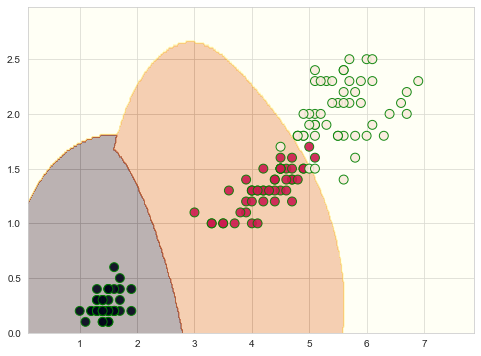

In [18]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap='afmhot', alpha=0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
           alpha=0.9, edgecolors='g')

## Gaussian Radial Basis Function Implementation

In [19]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                 'versicolor': 1,
                 'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   train_size=0.8,
                                                   random_state=0)

# Scale Features

In [20]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [22]:
C = 1.0
clf = svm.SVC(kernel='rbf', C=C, gamma=0.7)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# Cross Validation within Train Dataset 

In [24]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy : \t {0:.4f}".format(np.mean(res)))
print("Average SD : \t\t {0:.4f}".format(np.std(res)))

Average Accuracy : 	 0.9501
Average SD : 		 0.0538


In [25]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [26]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  3, 41]])

In [27]:
print("Precision Score : \t {0:.4f}".format(precision_score(y_train,
                                                           y_train_pred,
                                                           average='weighted')))
print("Recall Score : \t\t {0:.4f}".format(recall_score(y_train,
                                                           y_train_pred,
                                                           average='weighted')))
print("F1 Score : \t\t {0:.4f}".format(f1_score(y_train,
                                                           y_train_pred,
                                                           average='weighted')))

Precision Score : 	 0.9586
Recall Score : 		 0.9583
F1 Score : 		 0.9584


# Cross Validation within Test Dataset

In [28]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

In [29]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]])

In [30]:
print("Precision Score : \t {0:.4f}".format(precision_score(y_test,
                                                           y_test_pred,
                                                           average='weighted')))
print("Recall Score : \t\t {0:.4f}".format(recall_score(y_test,
                                                           y_test_pred,
                                                           average='weighted')))
print("F1 Score : \t\t {0:.4f}".format(f1_score(y_test,
                                                           y_test_pred,
                                                           average='weighted')))

Precision Score : 	 0.9422
Recall Score : 		 0.9333
F1 Score : 		 0.9290
